# McDonald's Nutrition Information in Data Science

Today we will look at 
    1. Data Munging with Beautiful Soup from a webpage
    2. Organizing and Cleaning
    3. Exploratory Data Analysis using scatterplots and linear regression
    4. Classification using Decision Trees and Random Forests
    5. Regression using Decision Trees and Random Forests

In this tutorial we will be looking at a set of data from McDonald's menu. Given that McDonald's has the calories available right on their menu board at all store locations, I want to see if/what relationships exist between calories and different nutritional elements as people with different health conditions are often far more worried about these other numbers than just the calories. For example, someone with diabetes might be interested in the sugar levels, or someone with hypertension may need to know the sodium content. We will also be using this dataset to learn about some Data Science and Machine Learning tools that are available via the sklearn module for python. 

In the code block below, I am senting the values of my headers, sending those headers along with my request to the page https://fastfoodnutrition.org/mcdonalds/chart and recieving back information from that web page. (To look at the HTML of a webpage before requesting it, go to the webpage in your browser and right click to find inspect, developer tools, or more tools.) 
Next I use BeautifulSoup to parser the html. Beautiful Soup is a package from the bs4 module that is immensely helpful in scraping data from html webpages. Using BeautifulSoup's find_all function I can locate all the tables, which on this webpage happens to be 20. After looking at the webpage I realized the subtitles in the chart were not actually connected to the tables, or split up by those headings, so I manually inserted those values then concatenated all the panda's DataFrames that I got as a result of pandas.read_html().
Lastly I retitle my columns to have meaningful names, drop rows with na values (3 rows) and reset my index. 

In [153]:
import requests
from bs4 import BeautifulSoup
import pandas 
import numpy as np
import warnings #used to disable some warnings that are not impacting this tutorial
warnings.filterwarnings('ignore')
headers={'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.110 Safari/537.36'}
nutr_page = requests.get('https://fastfoodnutrition.org/mcdonalds/chart',headers=headers)
nutr_soup = BeautifulSoup(nutr_page.text, 'html.parser')
nutr_table = nutr_soup.find_all("table")
dfs = pandas.read_html(str(nutr_table))
#categoriess determined by looking at webpage
dfs[0]['Category'] = 'sandwich'
dfs[1]['Category'] = 'sandwich'
dfs[2]['Category'] = 'sandwich'
dfs[3]['Category'] = 'drink'
dfs[4]['Category'] = 'drink'
dfs[5]['Category'] = 'drink'
dfs[6]['Category'] = 'breakfast'
dfs[7]['Category'] = 'breakfast'
dfs[8]['Category'] = 'nuggets & tenders'
dfs[9]['Category'] = 'nuggets & tenders'
dfs[10]['Category'] = 'condiment'
dfs[11]['Category'] = 'condiment'
dfs[12]['Category'] = 'dessert'
dfs[13]['Category'] = 'dessert'
dfs[14]['Category'] = 'mccafe'
dfs[15]['Category'] = 'mccafe'
dfs[16]['Category'] = 'mccafe'
dfs[17]['Category'] = 'mccafe'
dfs[18]['Category'] = 'mccafe'
dfs[19]['Category'] = 'salad'
dfs[20]['Category'] = 'side'
nutr_df_full = pandas.concat(dfs) #adds the data from the seperate tables into one dataframe
nutr_df_full.columns = ['Food','calories','calories_from_fat','tot_fat_g', 'sat_fat_g', 'trans_fat_g','cholesterol_mg', 'sodium_mg','carbs_g','fiber_g','sugar_g','protein_g','vitA_pdv','vitC_pdv','calcium_pdv','iron_pdv','category']
nutr_df = nutr_df_full.dropna()
nutr_df = nutr_df_full.reset_index(drop=True)
nutr_df.head()

,Food,calories,calories_from_fat,tot_fat_g,sat_fat_g,trans_fat_g,cholesterol_mg,sodium_mg,carbs_g,fiber_g,sugar_g,protein_g,vitA_pdv,vitC_pdv,calcium_pdv,iron_pdv,category
0,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3,11,37,4.0,20.0,20.0,15.0,sandwich
1,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2,18,46,6.0,20.0,20.0,30.0,sandwich
2,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3,18,70,10.0,20.0,50.0,40.0,sandwich
3,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2,18,55,6.0,25.0,20.0,20.0,sandwich
4,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4,18,46,6.0,20.0,20.0,20.0,sandwich


Now that we have our data, we will clean up the text a bit to make sure it is understandble, has consistent formatting and meaning throughout, and could be easier to combine with outside data in the future. 

In [124]:
nutr_df['Food'].replace(' [sS]hake',' milkshake',regex=True,inplace=True)#shake >>> milkshake
#nutr_df['Food'].replace('milkshake',' milkshake',regex=True,inplace=True)#shake >>> milkshake
nutr_df['Food'].replace('1/4','quarter',regex=True,inplace=True)#1/4 >> quarter
nutr_df['Food'].replace('lb.?','pounder',regex=True,inplace=True)#lb. >> pounder
nutr_df['Food'].replace(' ?pc.| ?Pc.| ?Piece| piece','piece',regex=True,inplace=True)#pc. >> piece
nutr_df['Food'].replace('bbq|BBQ|Barbeque','barbeque',regex=True,inplace=True)#bbq >> barbeque
nutr_df['Food'].replace('®|©','',regex=True,inplace=True)#drop TM, C, and R symbols
nutr_df['Food'].replace('™','',regex=True,inplace=True)
nutr_df['Food'].replace('(|)','',regex=True,inplace=True)
nutr_df['Food'].replace('w/','with',regex=True,inplace=True)
nutr_df['Food'].replace('witho','without',regex=True,inplace=True)
nutr_df['Food'].replace('[mM]c[cC]af[ée]','mcafe',regex=True,inplace=True)
nutr_df['Food'].replace('é','e',regex=True,inplace=True)
#nutr_df['Food'].replace(' [sS]auce','',regex=True,inplace=True)

Now that we have a clean data set, we will begin with our Exploratory Data Visualization using matplotlib.pyplot to create scatter plots, and LinearRegression from sklearn.linear_model to create linear regression models. 

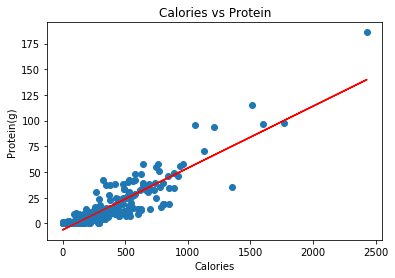

y = [ 0.06021259]x + -6.37462441902
score: 0.784561266063


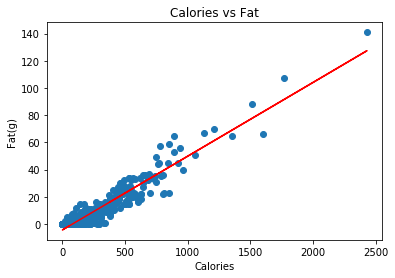

y = [ 0.05422602]x + -4.41613050916
score: 0.885960091675


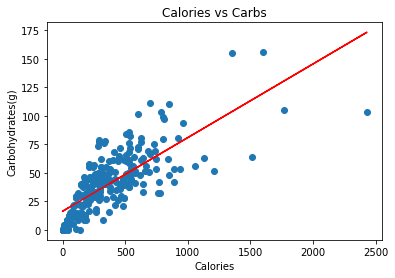

y = [ 0.06461254]x + 16.3521708813
score: 0.575331810813


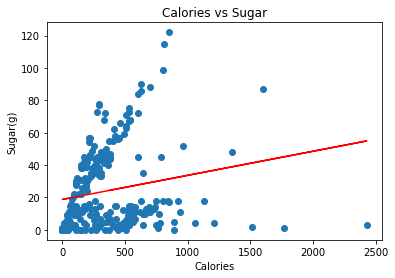

y = [ 0.01485629]x + 18.8202723031
score: 0.0367331362666


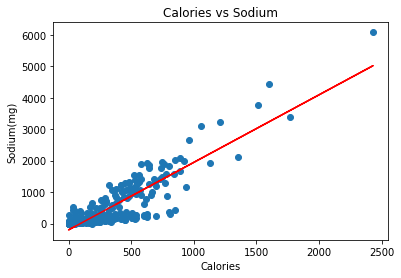

y = [ 2.14744811]x + -203.576786528
score: 0.75546535786


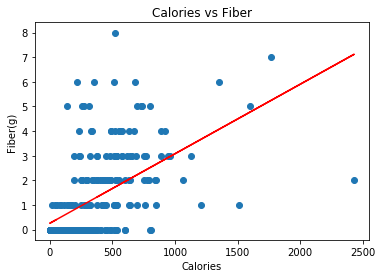

y = [ 0.00282443]x + 0.256359337085
score: 0.28373376353


In [159]:
import matplotlib.pyplot as ppl
from sklearn.linear_model import LinearRegression
ppl.scatter(nutr_df['calories'],nutr_df['protein_g'])
ppl.title('Calories vs Protein')
ppl.xlabel('Calories')
ppl.ylabel('Protein(g)')
reg = LinearRegression().fit(np.array(nutr_df['calories']).reshape(-1,1),nutr_df['protein_g'])
m = reg.coef_
b = reg.intercept_
ppl.plot(nutr_df['calories'],(m*nutr_df['calories'])+b,c='r')
ppl.show()
print('y = '+str(m)+"x + "+str(b))
print('score: '+str(reg.score(np.array(nutr_df['calories']).reshape(-1,1),nutr_df['protein_g'])))

ppl.scatter(nutr_df['calories'],nutr_df['tot_fat_g'])
ppl.title('Calories vs Fat')
ppl.xlabel('Calories')
ppl.ylabel('Fat(g)')
reg = LinearRegression().fit(np.array(nutr_df['calories']).reshape(-1,1),nutr_df['tot_fat_g'])
m = reg.coef_
b = reg.intercept_
ppl.plot(nutr_df['calories'],(m*nutr_df['calories'])+b,c='r')
ppl.show()
print('y = '+str(m)+"x + "+str(b))
print('score: ' + str(reg.score(np.array(nutr_df['calories']).reshape(-1,1),nutr_df['tot_fat_g'])))


ppl.scatter(nutr_df['calories'],nutr_df['carbs_g'])
ppl.title('Calories vs Carbs')
ppl.xlabel('Calories')
ppl.ylabel('Carbohydrates(g)')
reg = LinearRegression().fit(np.array(nutr_df['calories']).reshape(-1,1),nutr_df['carbs_g'])
m = reg.coef_
b = reg.intercept_
ppl.plot(nutr_df['calories'],(m*nutr_df['calories'])+b,c='r')
ppl.show()
print('y = '+str(m)+"x + "+str(b))
print('score: '+str(reg.score(np.array(nutr_df['calories']).reshape(-1,1),nutr_df['carbs_g'])))

ppl.scatter(nutr_df['calories'],nutr_df['sugar_g'])
ppl.title('Calories vs Sugar')
ppl.xlabel('Calories')
ppl.ylabel('Sugar(g)')
reg = LinearRegression().fit(np.array(nutr_df['calories']).reshape(-1,1),nutr_df['sugar_g'])
m = reg.coef_
b = reg.intercept_
ppl.plot(nutr_df['calories'],(m*nutr_df['calories'])+b,c='r')
ppl.show()
print('y = '+str(m)+"x + "+str(b))
print('score: ' + str(reg.score(np.array(nutr_df['calories']).reshape(-1,1),nutr_df['sugar_g'])))

ppl.scatter(nutr_df['calories'],nutr_df['sodium_mg'])
ppl.title('Calories vs Sodium')
ppl.xlabel('Calories')
ppl.ylabel('Sodium(mg)')
reg = LinearRegression().fit(np.array(nutr_df['calories']).reshape(-1,1),nutr_df['sodium_mg'])
m = reg.coef_
b = reg.intercept_
ppl.plot(nutr_df['calories'],(m*nutr_df['calories'])+b,c='r')
ppl.show()
print('y = '+str(m)+"x + "+str(b))
print('score: '+ str(reg.score(np.array(nutr_df['calories']).reshape(-1,1),nutr_df['sodium_mg'])))

ppl.scatter(nutr_df['calories'],nutr_df['fiber_g'])
ppl.title('Calories vs Fiber')
ppl.xlabel('Calories')
ppl.ylabel('Fiber(g)')
reg = LinearRegression().fit(np.array(nutr_df['calories']).reshape(-1,1),nutr_df['fiber_g'])
m = reg.coef_
b = reg.intercept_
ppl.plot(nutr_df['calories'],(m*nutr_df['calories'])+b,c='r')
ppl.show()
print('y = '+str(m)+"x + "+str(b))
print('score: '+ str(reg.score(np.array(nutr_df['calories']).reshape(-1,1),nutr_df['fiber_g'])))



These graphs are all looking for a relationship between calories and other attributes of the dataset. You can guess that the greater the calories the more it probably has of anything. This assumption seems hold here, but there are some interesting things going on here (with sugar especially). These graphs also have a red line drawn on them. This line comes from a linear regression model created using sklearn's LinearRegression from their linear_model package. 

Now we'll use a Decision Tree to try and predict the classification values of the food items. 

In [155]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
nutr_df=nutr_df.dropna()

tree = DecisionTreeClassifier()
X = np.array(nutr_df.drop(columns=['Food','category']))
y = np.array(nutr_df[['category']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
tree.fit(X_train,y_train)
print('Decision Tree (Classification) accuracy: ' + str(tree.score(X_test,y_test)))


Decision Tree (Classification) accuracy: 0.769230769231


We can do the same thing with a Random Forest which functions as a bunch of decisions trees overlayed on one another. This can give a more accurate result. Our data set is small so the difference is not too large. 

In [156]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
print('Random Forest (Classification) accuracy: '+str(forest.score(X_test,y_test)))


Random Forest (Classification) accuracy: 0.846153846154


The previous two calculations show us examples of supervised machine learning for classfication. We can also use Decsion trees and random forests for regression, meaning we can use them to estimate numeric values. 

In [157]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
X = np.array(nutr_df.drop(columns=['Food','calories','category']))
y = np.array(nutr_df[['calories']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
tree.fit(X_train,y_train)
print('Decision Tree (Regression) Accuracy: '+str(tree.score(X_test,y_test)))

Decision Tree (Regression) Accuracy: 0.938414237603


In [158]:
from sklearn.ensemble import RandomForestRegressor
tree = RandomForestRegressor()
tree.fit(X_train,y_train)
print('Random Forest (Regression) Accuracy: '+str(tree.score(X_test,y_test)))

Random Forest (Regression) Accuracy: 0.968143875117


Again we can see that the Random Forest gives us the edge in accuracy. This comes at the cost of being slower to calculate, but on a small dataset like this the amount is negligible. 

Documentation for Packages Used
requests: http://docs.python-requests.org/en/master/
pandas: https://pandas.pydata.org/
numpy: http://www.numpy.org/
BeautifulSoup from bs4: https://www.crummy.com/software/BeautifulSoup/bs4/doc/
LinearRegression from sklearn.linear_model: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
train_test_split from sklearn.model_selection: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
DecisionTreeClassifier from sklearn.tree: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
DecisionTreeRegressor from sklearn.tree: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.score
RandomForestClassifier from sklearn.ensemble: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
RandomForestRegressor from sklearn.ensemble: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

